## Deep Audio Classification 

Data Source: https://www.kaggle.com/datasets/kenjee/z-by-hp-unlocked-challenge-3-signal-processing

### 1. Import and Install Dependencies

#### 1.1 Install Dependencies

In [3]:
# !pip install tensorflow-io==0.32 # for audio processing

#### 1.2 Load Dependencies

In [4]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

2024-09-27 17:18:30.573585: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2. Build Data Loading Function

#### 2.1 Define Paths to Files

In [5]:
CAPUCHIN_FILE = os.path.join('data', 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

In [6]:
CAPUCHIN_FILE, NOT_CAPUCHIN_FILE

('data/Parsed_Capuchinbird_Clips/XC3776-3.wav',
 'data/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav')

#### 2.2 Build DataLoading Function

In [7]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)  
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000Hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [8]:
file_contents = tf.io.read_file(CAPUCHIN_FILE)
file_contents

2024-09-27 17:18:33.843484: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF\xbc\t\x04\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00data\x98\t\x04\x00\xc5\xf1(\xfb\x7f\x07F\x13|\x1c\xa3$\x07.R8\x03A\xbaF\xb6J\xb4NQR\x92S\x95Q\xa1M/I\xb3CJ;\x88/\xa2"X\x17\x12\x0e\xce\x04\xdd\xf9\x07\xeei\xe3\xc3\xda\xa5\xd2\xae\xc9\xc4\xc0P\xbaB\xb7\xb5\xb5-\xb3\xaa\xaf\xad\xad\x00\xafd\xb22\xb5\xeb\xb6\xf5\xb9m\xc0\x1e\xc9\xc6\xd0-\xd6\xba\xdbO\xe4[\xefG\xf9\xd2\xff\xc3\x04\x87\x0b\xec\x14m\x1e\xc6%\xc4+\xb22\xa3:\xd7@\x17C\x86B8BoC[D\xc5B\xda>\x9e:\x117\xeb2`,_#\x93\x19\x82\x10X\x08M\x00\xb2\xf7j\xee\t\xe5\xc1\xdc\xbc\xd6\xf3\xd2\xeb\xcfV\xcc\x1c\xc9\xc5\xc8b\xcc\x95\xd1\xe6\xd4\xe4\xd5\xda\xd7\xb2\xdd\x13\xe6\xf3\xec\xc8\xf0\x99\xf4\x00\xfc@\x06\xed\x0eX\x13\x94\x154\x19:\x1e!!\xcb\x1fj\x1cu\x1a\xdd\x19A\x17\xd6\x100\t\t\x04f\x01\xd3\xfd_\xf7\x84\xf0\xf7\xec\xb5\xec\x16\xec\xc1\xe8\xd8\xe4.\xe4V\xe72\xeb<\xed\xad\xeeb\xf2\xc1\xf8E\xff\x00\x04\x04\x08t\r!\x14\x83\x19\xfe\x1b\xd6\x1cJ\x1e\x

In [9]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)  
wav

<tf.Tensor: shape=(132300, 1), dtype=float32, numpy=
array([[-0.11117554],
       [-0.0378418 ],
       [ 0.05856323],
       ...,
       [-0.01077271],
       [-0.03436279],
       [-0.04879761]], dtype=float32)>

In [10]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=44100>

In [11]:
len(wav)

132300

In [12]:
wav = tfio.audio.resample(wav, rate_in=44100, rate_out=16000)
wav

2024-09-27 17:18:34.253613: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA


<tf.Tensor: shape=(48000, 1), dtype=float32, numpy=
array([[ 8.9910554e-07],
       [-2.7947258e-06],
       [ 7.0741157e-06],
       ...,
       [-1.0823049e-02],
       [-3.5766482e-03],
       [ 1.5143131e-02]], dtype=float32)>

### 2.3 Plot Wave

In [13]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

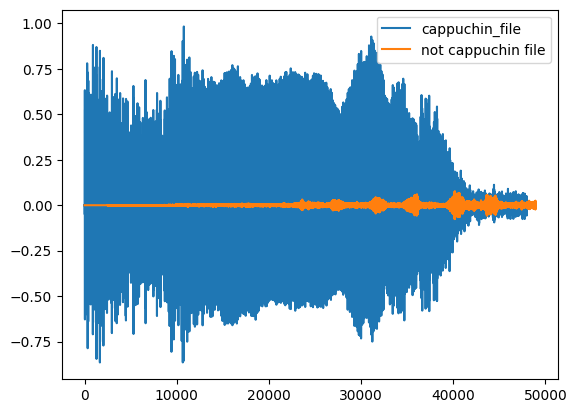

In [14]:
plt.plot(wave, label='cappuchin_file')
plt.plot(nwave, label='not cappuchin file')
plt.legend()
plt.show()

### 3. Create Tensorflow Dataset

#### 3.1 Define Paths to Positive and Negative Data

In [15]:
POS = os.path.join('data', 'Parsed_Capuchinbird_Clips')
NEG = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips')

In [16]:
POS, NEG

('data/Parsed_Capuchinbird_Clips', 'data/Parsed_Not_Capuchinbird_Clips')

#### 3.2 Create Tensorflow Datasets

In [17]:
pos = tf.data.Dataset.list_files(POS+"/*.wav")
neg = tf.data.Dataset.list_files(NEG+"/*.wav")

In [18]:
pos.as_numpy_iterator().next()

2024-09-27 17:18:36.097943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [217]
	 [[{{node Placeholder/_0}}]]
2024-09-27 17:18:36.098305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [217]
	 [[{{node Placeholder/_0}}]]


b'data/Parsed_Capuchinbird_Clips/XC79965-4.wav'

#### 3.3 Add labels and Combine Positive and Negative Samples

In [19]:
tf.ones(len(pos)), tf.zeros(len(neg))

(<tf.Tensor: shape=(217,), dtype=float32, numpy=
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.,

In [20]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [21]:
positives.as_numpy_iterator().next(), negatives.as_numpy_iterator().next()

2024-09-27 17:18:36.258699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [217]
	 [[{{node Placeholder/_7}}]]
2024-09-27 17:18:36.261276: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [217]
	 [[{{node Placeholder/_7}}]]
2024-09-27 17:18:36.272747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [593]
	 [[

((b'data/Parsed_Capuchinbird_Clips/XC201990-3.wav', 1.0),
 (b'data/Parsed_Not_Capuchinbird_Clips/cricket-sounds-for-sleep-45.wav', 0.0))

In [22]:
data.shuffle(1000).as_numpy_iterator().next()

2024-09-27 17:18:36.313055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [217]
	 [[{{node Placeholder/_7}}]]
2024-09-27 17:18:36.313604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype float and shape [593]
	 [[{{node Placeholder/_17}}]]


(b'data/Parsed_Not_Capuchinbird_Clips/magpies-and-crows-cawing-sound-effect-6.wav',
 0.0)

### 4. Determine Average Length of a Capuchin Call 

#### 4.1 Calculate Wave Cycle Length

In [23]:
lengths = []

for file in os.listdir(os.path.join('data', 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('data', 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

In [24]:
lengths

[48000,
 64000,
 56000,
 56000,
 40000,
 56000,
 48000,
 64000,
 32000,
 55999,
 56000,
 40000,
 56000,
 32000,
 40000,
 40000,
 48000,
 64000,
 56000,
 56000,
 48000,
 48000,
 48000,
 64000,
 32000,
 48000,
 48000,
 48000,
 56000,
 72000,
 48000,
 56000,
 56000,
 48000,
 48000,
 48000,
 56000,
 64000,
 64000,
 64000,
 64000,
 40000,
 56000,
 56000,
 48000,
 56000,
 56000,
 55999,
 56000,
 39999,
 64000,
 56000,
 64000,
 48000,
 48000,
 64000,
 40000,
 48000,
 56000,
 56000,
 48000,
 64000,
 56000,
 48000,
 48000,
 64000,
 56000,
 56000,
 40000,
 64000,
 48000,
 48000,
 64000,
 56000,
 64000,
 48000,
 56000,
 56000,
 56000,
 64000,
 40000,
 40000,
 56000,
 48000,
 56000,
 56000,
 48000,
 72000,
 72000,
 48000,
 64000,
 48000,
 64000,
 64000,
 56000,
 56000,
 56000,
 56000,
 48000,
 56000,
 64000,
 56000,
 64000,
 72000,
 48000,
 40000,
 56000,
 56000,
 48000,
 56000,
 64000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 48000,
 56000,
 64000,
 48000,


#### 4.2 Calculate Mean, Min and Max

In [25]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [26]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [27]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [28]:
80000/16000, 32000/16000

(5.0, 2.0)

### 5. Build Preprocessing Function to Convert to Spectrogram

#### 5.1 Build Preprocessing Function

In [29]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [30]:
wav = load_wav_16k_mono(CAPUCHIN_FILE)
wav

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 8.9910554e-07, -2.7947258e-06,  7.0741157e-06, ...,
       -1.0823049e-02, -3.5766482e-03,  1.5143131e-02], dtype=float32)>

In [31]:
wav = wav[:48000]
zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
wav = tf.concat([zero_padding, wav], 0)
wav

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 8.9910554e-07, -2.7947258e-06,  7.0741157e-06, ...,
       -1.0823049e-02, -3.5766482e-03,  1.5143131e-02], dtype=float32)>

In [32]:
spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
spectrogram = tf.abs(spectrogram)
spectrogram

<tf.Tensor: shape=(1491, 257), dtype=float32, numpy=
array([[7.2591394e-02, 7.1032852e-02, 6.9773473e-02, ..., 4.7592903e-04,
        2.4586404e-04, 7.3611736e-06],
       [3.5664439e-03, 9.9268171e-04, 5.6907088e-03, ..., 3.8838305e-04,
        1.9547240e-04, 3.3080578e-05],
       [3.7607998e-03, 2.7487839e-03, 3.5495190e-03, ..., 3.2278040e-04,
        2.2552285e-04, 4.4688582e-05],
       ...,
       [5.8630481e-03, 8.9062378e-03, 1.5015538e-02, ..., 7.9599919e-04,
        3.3273522e-04, 1.2891740e-04],
       [3.7055314e-03, 6.7680865e-03, 1.3490748e-02, ..., 7.4697129e-04,
        4.1957214e-04, 2.7258694e-04],
       [6.5301359e-04, 3.5431648e-03, 1.0943870e-02, ..., 8.1216783e-04,
        4.3579860e-04, 1.9696355e-04]], dtype=float32)>

In [33]:
spectrogram = tf.expand_dims(spectrogram, axis=2)
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[7.2591394e-02],
        [7.1032852e-02],
        [6.9773473e-02],
        ...,
        [4.7592903e-04],
        [2.4586404e-04],
        [7.3611736e-06]],

       [[3.5664439e-03],
        [9.9268171e-04],
        [5.6907088e-03],
        ...,
        [3.8838305e-04],
        [1.9547240e-04],
        [3.3080578e-05]],

       [[3.7607998e-03],
        [2.7487839e-03],
        [3.5495190e-03],
        ...,
        [3.2278040e-04],
        [2.2552285e-04],
        [4.4688582e-05]],

       ...,

       [[5.8630481e-03],
        [8.9062378e-03],
        [1.5015538e-02],
        ...,
        [7.9599919e-04],
        [3.3273522e-04],
        [1.2891740e-04]],

       [[3.7055314e-03],
        [6.7680865e-03],
        [1.3490748e-02],
        ...,
        [7.4697129e-04],
        [4.1957214e-04],
        [2.7258694e-04]],

       [[6.5301359e-04],
        [3.5431648e-03],
        [1.0943870e-02],
        ...,
        [8.1216783

#### 5.2 Test Out the Function and Viz the Spectrogram

##### Positive Example

In [34]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

2024-09-27 17:18:48.047179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [217]
	 [[{{node Placeholder/_7}}]]
2024-09-27 17:18:48.047574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [217]
	 [[{{node Placeholder/_7}}]]


In [35]:
spectrogram, label = preprocess(filepath, label)

In [36]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[5.65923080e-02],
        [3.76384743e-02],
        [4.71561365e-02],
        ...,
        [6.57715791e-05],
        [2.94583751e-05],
        [7.05569983e-06]],

       [[1.49870366e-02],
        [2.08752714e-02],
        [1.80664901e-02],
        ...,
        [7.00608580e-05],
        [2.80450695e-05],
        [5.08576632e-05]],

       [[2.91135646e-02],
        [2.18104888e-02],
        [6.45493669e-03],
        ...,
        [6.03822664e-05],
        [1.52464245e-05],
        [5.30518591e-05]],

       ...,

       [[4.35382128e-02],
        [6.81629777e-02],
        [8.09799433e-02],
        ...,
        [5.50521690e-05],
        [1.94646836e-05],
        [1.13546848e-05]],

       [[6.52350858e-03],
        [5.68373241e-02],
        [7.81403482e-02],
        ...,
        [6.19183047e-05],
        [3.13557466e-05],
        [9.48831439e-06]],

       [[1.71615109e-02],
        [4.38967645e-02],
        [7.69599080e-02]

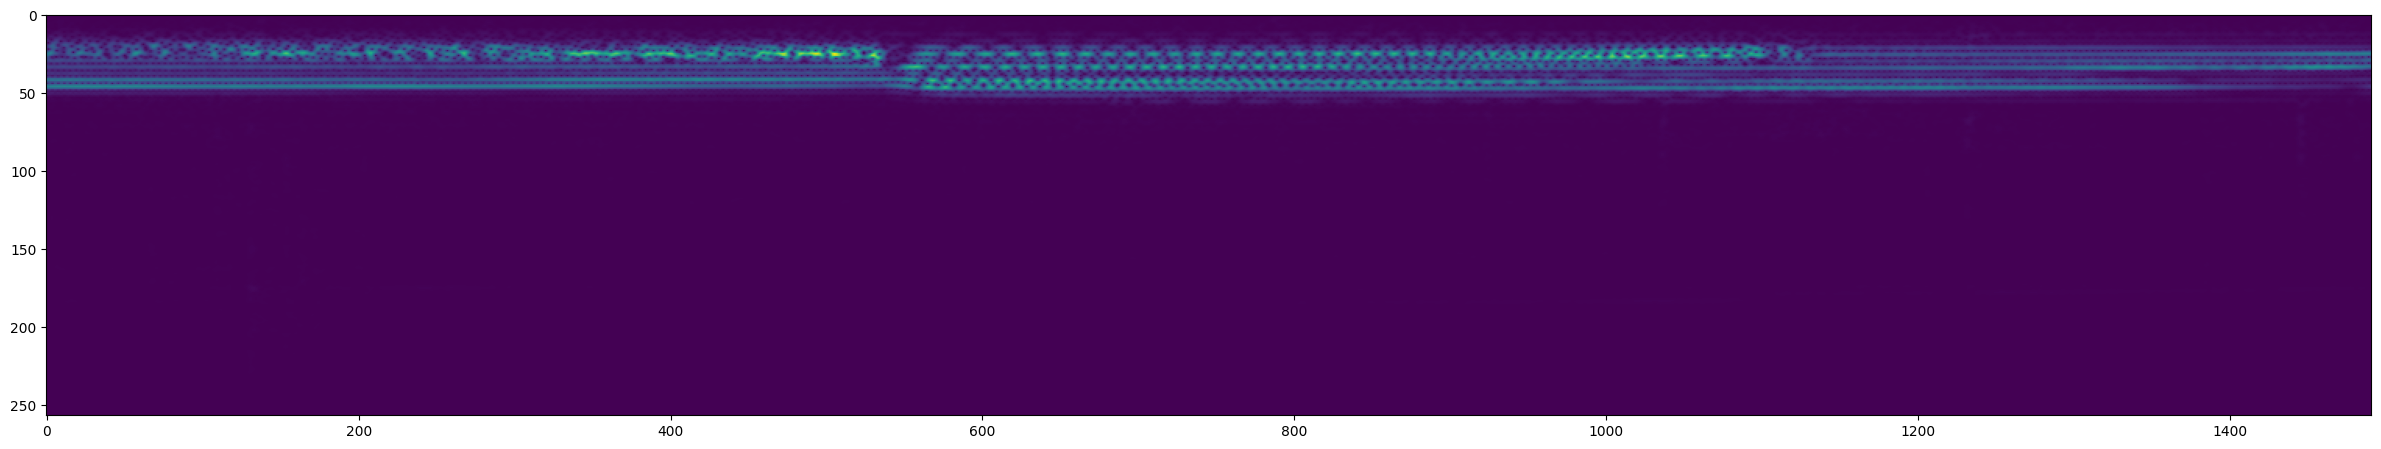

In [37]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

##### Negative Example

2024-09-27 17:18:48.825082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [593]
	 [[{{node Placeholder/_7}}]]
2024-09-27 17:18:48.825681: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [593]
	 [[{{node Placeholder/_7}}]]


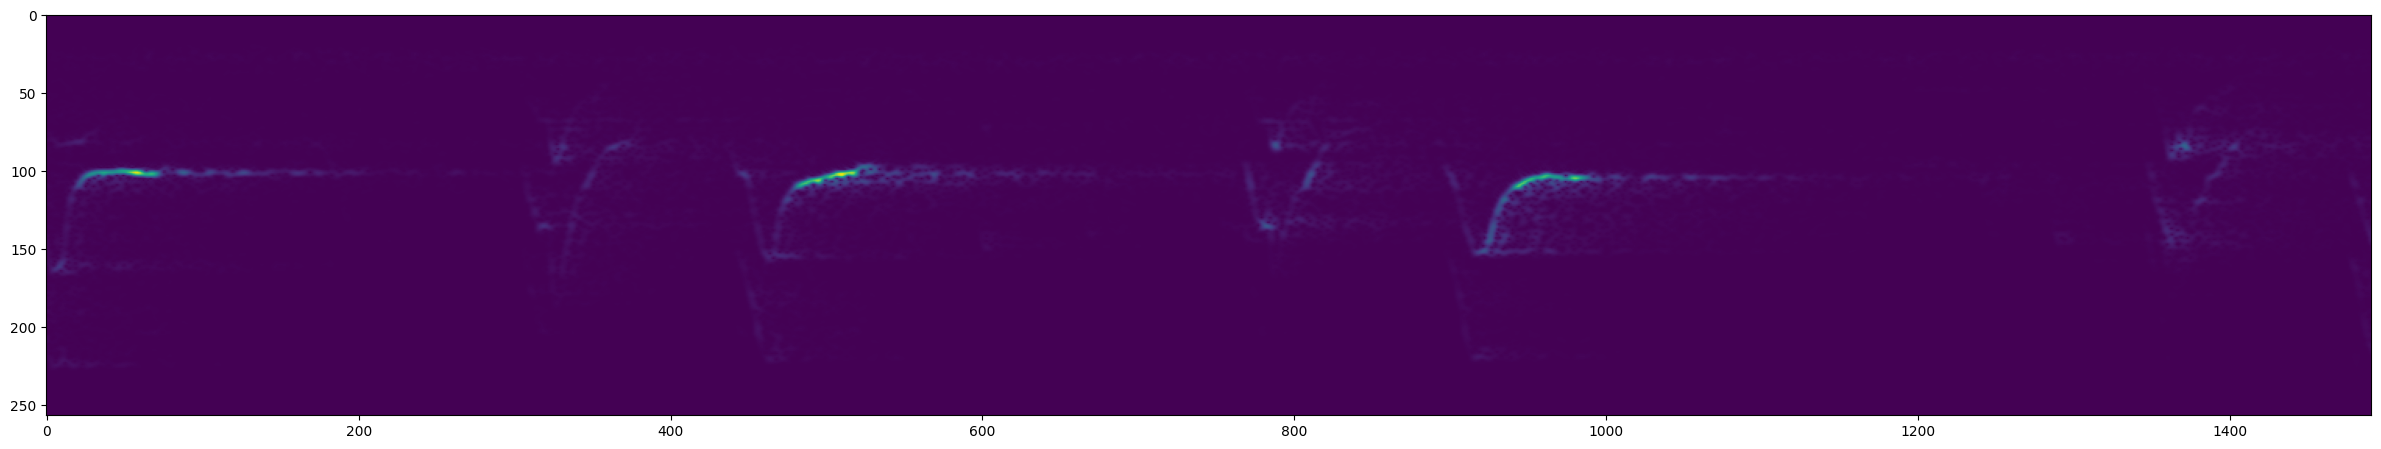

In [38]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

### 6. Create Training and Testing Partitions

#### 6.1 Create a Tensorflow Data Pipeline

In [39]:
data.as_numpy_iterator().next()

2024-09-27 17:18:49.414286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype string and shape [593]
	 [[{{node Placeholder/_10}}]]
2024-09-27 17:18:49.414774: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype string and shape [593]
	 [[{{node Placeholder/_10}}]]


(b'data/Parsed_Capuchinbird_Clips/XC201990-2.wav', 1.0)

In [40]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

#### 6.2 Split into Training and Testing Partitions

In [41]:
len(data)*.7

35.699999999999996

In [42]:
train = data.take(36)
test = data.skip(36).take(15)

#### 6.3 Test One Batch

In [43]:
samples, labels = train.as_numpy_iterator().next()

2024-09-27 17:18:50.277288: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype float and shape [593]
	 [[{{node Placeholder/_17}}]]
2024-09-27 17:18:50.278468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [217]
	 [[{{node Placeholder/_7}}]]
2024-09-27 17:19:00.354132: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 380 of 1000
2024-09-27 17:19:09.958722: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


In [44]:
samples.shape, labels.shape

((16, 1491, 257, 1), (16,))

In [45]:
labels

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

### 7. Build Deep Learning Model

#### 7.1 Load Tensorflow Dependencies

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

#### 7.2 Build Sequential Model, Compile and View Summary

In [49]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(1491, 257, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Add MaxPooling layer
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Add another MaxPooling layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 1489, 255, 16)     160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 744, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 742, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 371, 62, 16)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 368032)            0         
                                                                 
 dense (Dense)               (None, 128)              

### 7.3 Fit Model, View Loss and KPI Plots

In [52]:
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
36/36 [==============================] - ETA: 0s - loss: 1.1723 - recall: 0.8553 - precision: 0.7975

2024-09-27 17:24:19.812856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [217]
	 [[{{node Placeholder/_7}}]]
2024-09-27 17:24:19.814085: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype float and shape [593]
	 [[{{node Placeholder/_17}}]]


36/36 [==============================] - 70s 2s/step - loss: 1.1723 - recall: 0.8553 - precision: 0.7975 - val_loss: 0.1359 - val_recall: 0.8596 - val_precision: 0.9423
Epoch 2/4
36/36 [==============================] - 60s 2s/step - loss: 0.1047 - recall: 0.9073 - precision: 0.9786 - val_loss: 0.0220 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 3/4
36/36 [==============================] - 60s 2s/step - loss: 0.0257 - recall: 0.9799 - precision: 0.9932 - val_loss: 0.0045 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 4/4
36/36 [==============================] - 59s 2s/step - loss: 0.0088 - recall: 0.9935 - precision: 0.9935 - val_loss: 0.0041 - val_recall: 1.0000 - val_precision: 1.0000


In [56]:
hist.history

{'loss': [1.1722584962844849,
  0.10467157512903214,
  0.025657691061496735,
  0.008791383355855942],
 'recall': [0.8552631735801697,
  0.9072847962379456,
  0.9798657894134521,
  0.9935064911842346],
 'precision': [0.7975460290908813,
  0.9785714149475098,
  0.9931972622871399,
  0.9935064911842346],
 'val_loss': [0.13590869307518005,
  0.021996797993779182,
  0.004455989692360163,
  0.004095910582691431],
 'val_recall': [0.859649121761322, 1.0, 1.0, 1.0],
 'val_precision': [0.942307710647583, 1.0, 1.0, 1.0]}

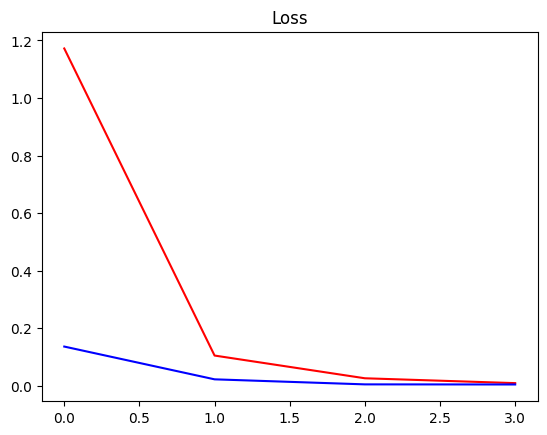

In [53]:
plt.title("Loss")
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

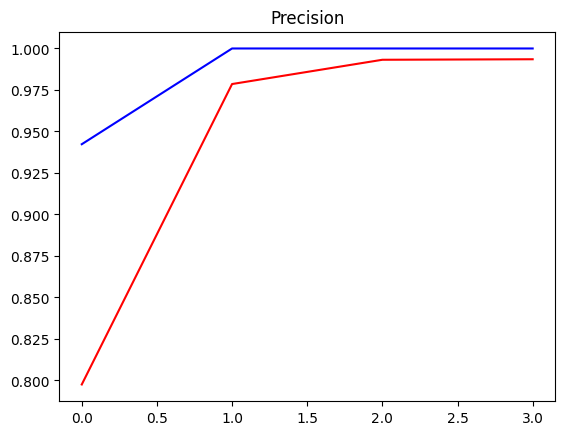

In [54]:
plt.title("Precision")
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

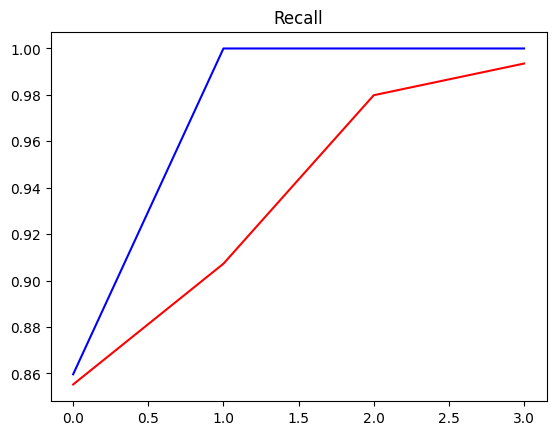

In [55]:
plt.title("Recall")
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

### 8. Make a prediction on a Single Clip

#### 8.1 Get One Batch and Make a Prediction

In [57]:
X_test, y_test = test.as_numpy_iterator().next()

In [60]:
X_test.shape, y_test.shape

((16, 1491, 257, 1), (16,))

In [67]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 251ms/step


In [68]:
yhat

array([[9.9866748e-01],
       [8.9092760e-09],
       [9.0085844e-10],
       [1.4070447e-23],
       [3.9232759e-07],
       [1.0000000e+00],
       [1.7088370e-10],
       [1.7694197e-12],
       [1.0000000e+00],
       [7.8559412e-07],
       [1.0000000e+00],
       [1.4727132e-02],
       [1.0000000e+00],
       [1.4887028e-05],
       [1.0000000e+00],
       [1.2310035e-09]], dtype=float32)

#### 8.2 Convert Logits to Classes

In [69]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]
yhat

[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [73]:
y_test.astype(int)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [70]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [71]:
tf.math.reduce_sum(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

### 9. Build Forest Parsing Functions

#### 9.1 Load up MP3s

In [74]:
def load_mp3_16k_mono(filename):
    """Load a WAV file, convert it to a float tensor, resample to 16 kHz single channel audio."""
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in = sample_rate, rate_out=16000 )
    return wav

In [75]:
mp3 = os.path.join('data', 'Forest Recordings', 'recording_00.mp3')
mp3

'data/Forest Recordings/recording_00.mp3'

In [76]:
wav = load_mp3_16k_mono(mp3)
wav

<tf.Tensor: shape=(2880666,), dtype=float32, numpy=
array([ 8.1433272e-12, -5.7019250e-12, -5.3486417e-12, ...,
       -1.1291276e-02, -1.4230422e-02, -3.0555837e-03], dtype=float32)>

In [77]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
audio_slices

<_BatchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [78]:
samples, index = audio_slices.as_numpy_iterator().next()

2024-09-27 18:01:11.823152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2024-09-27 18:01:11.824237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


In [80]:
len(audio_slices)

60

In [79]:
samples.shape

(1, 48000)

#### 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [81]:
def preprocess_mp3(sample, index):
    sample=sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

#### 9.3 Convert Longer Clips into Windows and Make Predictions

In [89]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [90]:
yhat = model.predict(audio_slices)
yhat

2024-09-27 20:27:56.093187: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:27:56.093741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 6s 6s/step


array([[6.22404106e-02],
       [2.34714393e-02],
       [1.55227780e-01],
       [9.85420287e-01],
       [1.00000000e+00],
       [4.77738306e-02],
       [1.05407527e-02],
       [2.13051569e-02],
       [1.71566047e-02],
       [3.39653231e-02],
       [2.94683818e-02],
       [2.79135946e-02],
       [1.31371440e-02],
       [9.99922812e-01],
       [1.00000000e+00],
       [1.16006741e-02],
       [2.88080919e-05],
       [1.49967968e-02],
       [4.41402607e-02],
       [1.09028816e-01],
       [4.91597429e-02],
       [3.08897477e-02],
       [1.90710872e-01],
       [9.26297665e-01],
       [1.00000000e+00],
       [6.30951067e-03],
       [2.04539206e-03],
       [5.69067374e-02],
       [1.58914745e-01],
       [6.70997426e-02],
       [2.73864977e-02],
       [1.03007928e-01],
       [8.52349389e-04],
       [1.88763981e-04],
       [1.54638827e-01],
       [8.86167586e-02],
       [1.00000000e+00],
       [1.28045797e-01],
       [5.22582456e-02],
       [3.39460224e-01],


In [92]:
yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]
yhat

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [93]:
len(yhat)

60

#### 9.4 Group Consecutive Detections

In [94]:
from itertools import groupby

In [95]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [96]:
yhat

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [98]:
calls

5

### 10. Make Predictions

#### 10.1 Loop over all recordings and make predictions

In [99]:
results = {}
for file in os.listdir(os.path.join('data', 'Forest Recordings')):
    FILEPATH = os.path.join('data', 'Forest Recordings', file)

    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    yhat = model.predict(audio_slices)
    results[file] = yhat

2024-09-27 20:35:39.708432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:35:39.709008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:35:43.028842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-09-27 20:35:43.029544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:35:45.352336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:35:45.352961: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:35:48.108542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:35:48.109421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:35:50.853439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:35:50.854049: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:35:53.343892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:35:53.345084: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:35:55.628470: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:35:55.629055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 3s 3s/step


2024-09-27 20:35:59.066912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2024-09-27 20:35:59.067473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 3s 3s/step


2024-09-27 20:36:02.484238: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2024-09-27 20:36:02.485528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:05.294364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:36:05.295003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:08.633385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2024-09-27 20:36:08.634331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:11.596357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2024-09-27 20:36:11.597481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:14.417549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:36:14.418952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:17.718099: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-09-27 20:36:17.719151: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:21.013634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:36:21.014454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:23.988461: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:36:23.989204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:26.813303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:36:26.814579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:29.973987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-09-27 20:36:29.974859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:33.129133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2024-09-27 20:36:33.130121: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:35.851062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2024-09-27 20:36:35.851848: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:43.609850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:36:43.611749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:46.307392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2024-09-27 20:36:46.307974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:48.867091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:36:48.867675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:51.713098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:36:51.716062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:54.228742: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:36:54.229483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:56.551102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:36:56.551892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:36:59.233540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2024-09-27 20:36:59.234431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:02.117803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:37:02.120563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:04.631724: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:37:04.632623: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:08.156668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:37:08.157409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:10.908288: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:37:10.912334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:13.420583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:37:13.421169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:16.658993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:37:16.660202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:19.363147: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-09-27 20:37:19.363716: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:22.114570: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2024-09-27 20:37:22.115143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:24.793820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-09-27 20:37:24.794407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:28.065696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2024-09-27 20:37:28.066422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:30.692988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:37:30.693700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:34.046398: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:37:34.046973: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:36.428601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:37:36.429673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:38.980841: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2024-09-27 20:37:38.981428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:42.680494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:37:42.681407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:45.183672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:37:45.184250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:48.736728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:37:48.737324: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:51.611849: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-09-27 20:37:51.612463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:54.123417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:37:54.124021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:56.532747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:37:56.533746: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:37:59.056679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:37:59.057254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:01.627488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:38:01.628061: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:04.123216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-09-27 20:38:04.123783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:06.812767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:38:06.813351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:09.138582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:38:09.139497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:11.559667: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:38:11.560551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:14.338255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:38:14.338825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:16.822267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:38:16.823440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:20.089389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2024-09-27 20:38:20.089988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:22.580116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:38:22.580673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:24.930778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:38:24.931723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:27.083355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-09-27 20:38:27.083961: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:30.427343: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:38:30.428500: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:33.353280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2024-09-27 20:38:33.353893: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:36.847310: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2024-09-27 20:38:36.848173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:39.335343: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-09-27 20:38:39.335935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:42.019505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-09-27 20:38:42.020130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:44.193004: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:38:44.193603: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:46.342334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:38:46.343252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:48.488228: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:38:48.489151: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:50.829289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:38:50.829854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:54.087281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:38:54.087853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:38:57.333252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2024-09-27 20:38:57.333829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:00.581680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:39:00.582271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:02.815519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:39:02.816440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:06.058689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:39:06.059528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:08.558389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:39:08.559076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:11.817226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]
2024-09-27 20:39:11.817785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:15.058951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:39:15.059527: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:17.215083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2024-09-27 20:39:17.215654: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:19.350375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:39:19.350963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:21.515934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:39:21.516499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:24.785433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:39:24.786014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:28.031086: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:39:28.031657: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:30.176137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:39:30.177076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:32.408279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2024-09-27 20:39:32.409113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:34.592303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2024-09-27 20:39:34.592888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:36.771249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-09-27 20:39:36.772106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:40.005384: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:39:40.006296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:42.219678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2024-09-27 20:39:42.220268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:45.471858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:39:45.472451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:47.636452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:39:47.637031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:49.817266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2024-09-27 20:39:49.817844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:51.990419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-09-27 20:39:51.990993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:55.237267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:39:55.237899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:57.423955: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:39:57.424523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:39:59.570652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:39:59.571249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:40:01.749638: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]
2024-09-27 20:40:01.750228: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:40:03.974693: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:40:03.975606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:40:06.141938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2024-09-27 20:40:06.142767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:40:09.353721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2880666]
	 [[{{node Placeholder/_0}}]]
2024-09-27 20:40:09.354314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [60]
	 [[{{node Placeholder/_28}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:40:11.514719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [60]
	 [[{{node Placeholder/_8}}]]
2024-09-27 20:40:11.515301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 2s 2s/step


2024-09-27 20:40:15.026975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-09-27 20:40:15.028866: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype float and shape [2880666]
	 [[{{node Placeholder/_20}}]]


1/1 [==============================] - 3s 3s/step


In [101]:
results

{'recording_62.mp3': array([[2.0377607e-18],
        [3.5847679e-18],
        [7.3586487e-15],
        [2.8354731e-07],
        [5.1330458e-17],
        [3.3818564e-13],
        [4.9191078e-17],
        [4.7170090e-10],
        [2.8031775e-16],
        [8.0728549e-14],
        [1.0772072e-14],
        [1.7893133e-17],
        [1.2955992e-07],
        [1.0899685e-12],
        [8.0635880e-11],
        [1.1391413e-17],
        [1.0135075e-21],
        [9.9958224e-20],
        [5.2108743e-18],
        [1.9929381e-14],
        [1.4219792e-17],
        [6.2397267e-15],
        [5.4619377e-06],
        [3.2312163e-16],
        [5.4706096e-12],
        [2.7985632e-15],
        [1.7316525e-11],
        [8.5655753e-14],
        [4.8225082e-14],
        [4.8483808e-13],
        [2.1941518e-18],
        [3.3407102e-07],
        [3.4264093e-03],
        [7.6015317e-17],
        [1.7320122e-19],
        [3.7794112e-20],
        [2.1716666e-20],
        [1.1784031e-18],
        [2.8629299e-15],
     

#### 10.2 Convert predictions into Classes

In [100]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

{'recording_62.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_92.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_79.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_82.mp3': [0,
  0,
  0,
  

#### 10.3 Group Consecutive Detections

In [104]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'recording_62.mp3': 0,
 'recording_92.mp3': 0,
 'recording_79.mp3': 0,
 'recording_82.mp3': 0,
 'recording_00.mp3': 5,
 'recording_49.mp3': 0,
 'recording_85.mp3': 0,
 'recording_06.mp3': 5,
 'recording_68.mp3': 1,
 'recording_70.mp3': 3,
 'recording_48.mp3': 4,
 'recording_40.mp3': 1,
 'recording_19.mp3': 0,
 'recording_63.mp3': 12,
 'recording_34.mp3': 4,
 'recording_11.mp3': 3,
 'recording_60.mp3': 4,
 'recording_44.mp3': 1,
 'recording_37.mp3': 3,
 'recording_02.mp3': 0,
 'recording_38.mp3': 1,
 'recording_83.mp3': 0,
 'recording_46.mp3': 8,
 'recording_69.mp3': 1,
 'recording_18.mp3': 2,
 'recording_87.mp3': 24,
 'recording_26.mp3': 2,
 'recording_28.mp3': 14,
 'recording_22.mp3': 2,
 'recording_16.mp3': 5,
 'recording_61.mp3': 7,
 'recording_77.mp3': 3,
 'recording_90.mp3': 0,
 'recording_23.mp3': 5,
 'recording_17.mp3': 3,
 'recording_98.mp3': 21,
 'recording_24.mp3': 0,
 'recording_01.mp3': 0,
 'recording_08.mp3': 25,
 'recording_91.mp3': 0,
 'recording_58.mp3': 0,
 'recording

### 11. Export Results

In [105]:
import csv

In [107]:
with open('capuchinbird_results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])